In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import InputLayer, Dense, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('final_project(5).csv')
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

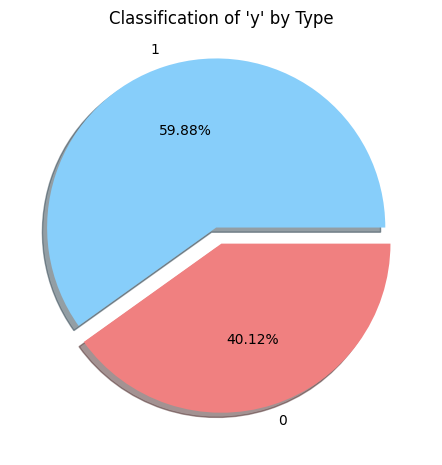

In [5]:
import matplotlib.pyplot as plt
# Plot of the Classification of "y"
pie_labels = '1', '0',
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)
plt.figure(figsize=(12, 12))
plt.subplot(121)
df['y'].value_counts(dropna=False).plot.pie(
    autopct='%0.2f%%', labels=pie_labels, colors=colors, explode=explode, shadow=True)

plt.title("Classification of 'y' by Type")
plt.ylabel("")
plt.show()

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
x0,x0,0.016250
x1,x1,0.015625
x2,x2,0.023750
x3,x3,0.023125
x4,x4,0.016250
x5,x5,0.023125
x6,x6,0.016250
x7,x7,0.016875
x8,x8,0.013125
x9,x9,0.018750


In [7]:
df.shape

(160000, 51)

There are 50 x variables (x0 to x49), and 1 response variable y.

In [8]:
df._get_numeric_data().columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34',
       'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45',
       'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [9]:
df._get_numeric_data().columns.shape

(46,)

In [10]:
other_cols= [i for i in df.columns if df.dtypes[i]=='object']
other_cols

['x24', 'x29', 'x30', 'x32', 'x37']

The number of numerical columns and other columns total to 51, so there are only 2 types of variables: numerical and object.

In [11]:
df.x24.value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [12]:
df.x29.value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [13]:
df.x30.value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [14]:
df.x32.value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [15]:
df.x37.value_counts()

$-311.26     6
$-336.77     6
$237.4       6
$72.42       6
$341.26      6
            ..
$-505.21     1
$770.07      1
$74.62       1
$-1082.96    1
$-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [16]:
df['x37'] = df['x37'].str.replace('$', '')

C:\Users\dnguy\AppData\Local\Temp\ipykernel_11424\2630599638.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x37'] = df['x37'].str.replace('$', '')


In [17]:
df.x37.value_counts()

-311.26     6
-336.77     6
237.4       6
72.42       6
341.26      6
           ..
-505.21     1
770.07      1
74.62       1
-1082.96    1
-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [18]:
df['x37'] = df['x37'].astype('float64')

x37 should now appear in numberical_cols, and should not be in categorical_cols. Both should total to 51.

In [19]:
numerical_cols = df._get_numeric_data().columns
numerical_cols

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44',
       'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [20]:
numerical_cols.shape

(47,)

In [21]:
categorical_cols = [i for i in df.columns if df.dtypes[i]=='object']
categorical_cols

['x24', 'x29', 'x30', 'x32']

#### Addressing Missing Values

array([[<AxesSubplot: title={'center': 'x0'}>,
        <AxesSubplot: title={'center': 'x1'}>,
        <AxesSubplot: title={'center': 'x2'}>,
        <AxesSubplot: title={'center': 'x3'}>,
        <AxesSubplot: title={'center': 'x4'}>,
        <AxesSubplot: title={'center': 'x5'}>,
        <AxesSubplot: title={'center': 'x6'}>],
       [<AxesSubplot: title={'center': 'x7'}>,
        <AxesSubplot: title={'center': 'x8'}>,
        <AxesSubplot: title={'center': 'x9'}>,
        <AxesSubplot: title={'center': 'x10'}>,
        <AxesSubplot: title={'center': 'x11'}>,
        <AxesSubplot: title={'center': 'x12'}>,
        <AxesSubplot: title={'center': 'x13'}>],
       [<AxesSubplot: title={'center': 'x14'}>,
        <AxesSubplot: title={'center': 'x15'}>,
        <AxesSubplot: title={'center': 'x16'}>,
        <AxesSubplot: title={'center': 'x17'}>,
        <AxesSubplot: title={'center': 'x18'}>,
        <AxesSubplot: title={'center': 'x19'}>,
        <AxesSubplot: title={'center': 'x20'}>],

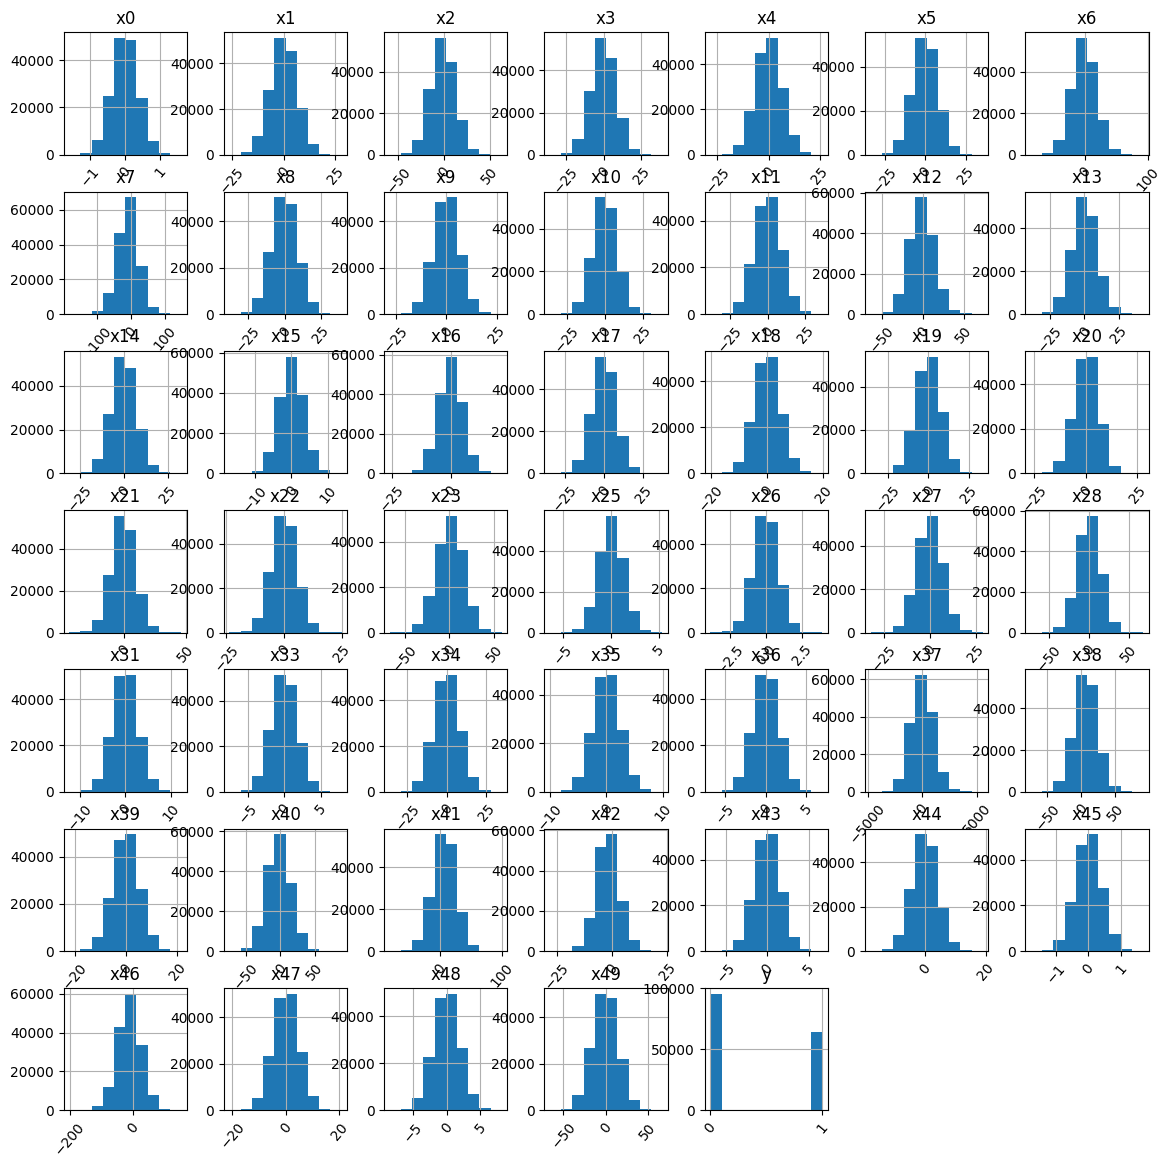

In [22]:
df.hist(figsize=(14,14), xrot=50)

Since all numeric variables have a normal distribution, the median imputation is most appropriate.

In [23]:
df = df.fillna(df.median()) # this automatically picks numeric variables

C:\Users\dnguy\AppData\Local\Temp\ipykernel_11424\1724753464.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median()) # this automatically picks numeric variables


In [24]:
df.isnull().any().value_counts()

False    47
True      4
dtype: int64

Since all numeric variables with missing values are dealt with, the 4 with missing values found above must be categorical variables.

In [25]:
df['x24'] = df['x24'].fillna('Unknown')
df['x29'] = df['x29'].fillna('Unknown')
df['x30'] = df['x30'].fillna('Unknown')
df['x32'] = df['x30'].fillna('Unknown')

In [26]:
df.isnull().any().value_counts()

False    51
dtype: int64

# Setting y

In [27]:
y = df['y']  
y.shape

(160000,)

# Setting x

In [28]:
numerical_cols_df = df[numerical_cols].copy().drop('y', axis=1)
numerical_cols_df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,-5.032652,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,-8.472736,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,22.669070,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,-32.356360,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424


#### Scale Numerical Columns

In [29]:
# Range of 0,1 is important for well trained neural networks
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_num_cols_df = pd.DataFrame(scaler.fit_transform(numerical_cols_df), columns=numerical_cols_df.columns.values)
scaled_num_cols_df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,0.446557,0.411243,0.520704,0.510314,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0.389523,0.442713,0.659024,0.335659,0.530542,0.435039,0.744595,0.319552,0.516953,0.435302
1,0.451776,0.473453,0.709567,0.532771,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0.467859,0.650102,0.640781,0.563451,0.661485,0.806781,0.617071,0.386174,0.488725,0.621933
2,0.397975,0.457897,0.582770,0.565501,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0.449376,0.448907,0.731646,0.456316,0.411634,0.732644,0.659746,0.325781,0.382812,0.436589
3,0.421809,0.577796,0.286681,0.525847,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0.528866,0.537043,0.404452,0.724121,0.311967,0.634929,0.366905,0.630861,0.615924,0.438086
4,0.413112,0.489890,0.390773,0.499490,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0.638885,0.374585,0.448676,0.638789,0.592156,0.483935,0.532318,0.498006,0.454349,0.614432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0.346208,0.405555,0.486510,0.450161,0.552406,0.470718,0.486510,0.673178,0.466086,0.462557,...,0.423778,0.399395,0.712041,0.442652,0.447186,0.405926,0.615749,0.607075,0.278683,0.709896
159996,0.757202,0.572778,0.663379,0.629823,0.551645,0.588322,0.663379,0.511795,0.440834,0.626747,...,0.402658,0.521192,0.568660,0.456885,0.349114,0.507045,0.574468,0.655332,0.425647,0.483665
159997,0.247424,0.583067,0.542034,0.376170,0.562233,0.447824,0.542034,0.677507,0.509664,0.628080,...,0.593849,0.449027,0.549183,0.561661,0.680764,0.575197,0.537791,0.580862,0.581521,0.521047
159998,0.604942,0.624478,0.526782,0.438962,0.594233,0.708424,0.526782,0.517980,0.525157,0.582237,...,0.256028,0.449241,0.540151,0.253233,0.500183,0.572678,0.586665,0.543561,0.491158,0.480933


#### Get Dummies for Categorical Columns

In [30]:
dummied_cat_cols_df = pd.get_dummies(df[categorical_cols])
dummied_cat_cols_df

,x24_Unknown,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dev,x29_Feb,x29_January,x29_July,...,x30_monday,x30_thurday,x30_tuesday,x30_wednesday,x32_Unknown,x32_friday,x32_monday,x32_thurday,x32_tuesday,x32_wednesday
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
159996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
159997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
159998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
preproc_x = pd.concat([scaled_num_cols_df, dummied_cat_cols_df], axis=1)
preproc_x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30_monday,x30_thurday,x30_tuesday,x30_wednesday,x32_Unknown,x32_friday,x32_monday,x32_thurday,x32_tuesday,x32_wednesday
0,0.446557,0.411243,0.520704,0.510314,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0,0,1,0,0,0,0,0,1,0
1,0.451776,0.473453,0.709567,0.532771,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0,0,0,1,0,0,0,0,0,1
2,0.397975,0.457897,0.582770,0.565501,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0,0,0,1,0,0,0,0,0,1
3,0.421809,0.577796,0.286681,0.525847,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0,0,0,1,0,0,0,0,0,1
4,0.413112,0.489890,0.390773,0.499490,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0.346208,0.405555,0.486510,0.450161,0.552406,0.470718,0.486510,0.673178,0.466086,0.462557,...,0,0,0,1,0,0,0,0,0,1
159996,0.757202,0.572778,0.663379,0.629823,0.551645,0.588322,0.663379,0.511795,0.440834,0.626747,...,0,0,0,1,0,0,0,0,0,1
159997,0.247424,0.583067,0.542034,0.376170,0.562233,0.447824,0.542034,0.677507,0.509664,0.628080,...,0,0,0,1,0,0,0,0,0,1
159998,0.604942,0.624478,0.526782,0.438962,0.594233,0.708424,0.526782,0.517980,0.525157,0.582237,...,0,0,0,1,0,0,0,0,0,1


#### Split Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(preproc_x, y, test_size=0.2, random_state=42)

In [33]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
missing_value_df = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': percent_missing})

with pd.option_context('display.max_rows', None,):
   print(missing_value_df)

                 column_name  percent_missing
x0                        x0              0.0
x1                        x1              0.0
x2                        x2              0.0
x3                        x3              0.0
x4                        x4              0.0
x5                        x5              0.0
x6                        x6              0.0
x7                        x7              0.0
x8                        x8              0.0
x9                        x9              0.0
x10                      x10              0.0
x11                      x11              0.0
x12                      x12              0.0
x13                      x13              0.0
x14                      x14              0.0
x15                      x15              0.0
x16                      x16              0.0
x17                      x17              0.0
x18                      x18              0.0
x19                      x19              0.0
x20                      x20      

In [34]:
y_train.isnull().any()

False

# Neural Network

#### Design

In [35]:
model = Sequential()
model.add(Dense(500, input_shape=(75,), activation='relu', kernel_constraint=MaxNorm(3))) # 75 columns means 75 input neurons
model.add(Dropout(0.2))
model.add(Dense(400, activation='relu', kernel_constraint=MaxNorm(3))) # average number of neurons of both input and output layers
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) # classification output as 1 neuron sigmoid for faster output than 2 neurons softmax

#### Compile with Early Stopping

In [37]:
model.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss', patience=3)
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=100,
    validation_data=(X_test, y_test),
    callbacks=[callback]
    )

Epoch 1/100
1280/1280 [==============================] - 6s 4ms/step - loss: 0.2554 - accuracy: 0.8968 - val_loss: 0.1910 - val_accuracy: 0.9262
Epoch 2/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2473 - accuracy: 0.9005 - val_loss: 0.1859 - val_accuracy: 0.9279
Epoch 3/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2413 - accuracy: 0.9038 - val_loss: 0.1844 - val_accuracy: 0.9287
Epoch 4/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2370 - accuracy: 0.9044 - val_loss: 0.1768 - val_accuracy: 0.9327
Epoch 5/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2303 - accuracy: 0.9081 - val_loss: 0.1810 - val_accuracy: 0.9319
Epoch 6/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2263 - accuracy: 0.9100 - val_loss: 0.1643 - val_accuracy: 0.9379
Epoch 7/100
1280/1280 [==============================] - 5s 4ms/step - loss: 0.2219 - accuracy: 0.9125 - val_loss: 0.1757 - val_ac

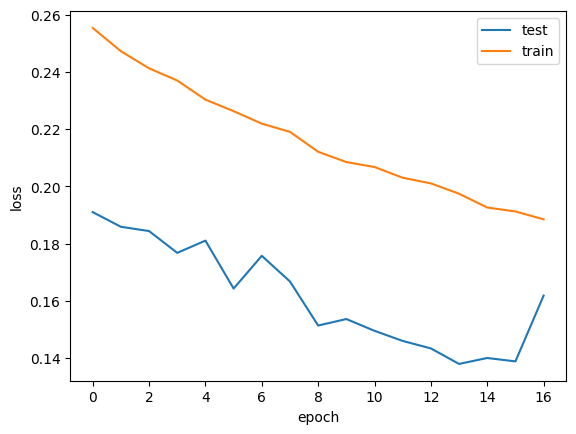

In [38]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_loss'],label='test')
plt.plot(model.history.history['loss'], label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

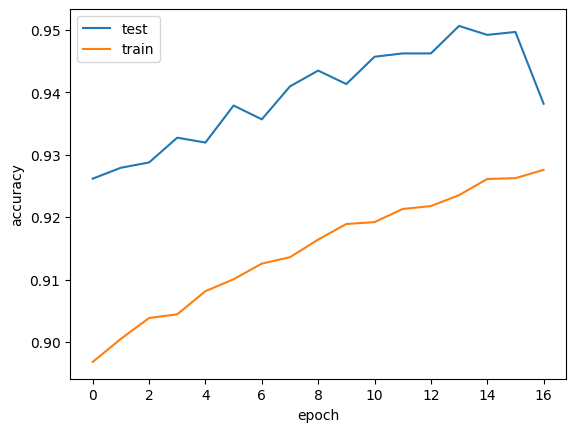

In [39]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_accuracy'],label='test')
plt.plot(model.history.history['accuracy'], label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

#### Classification Report

In [40]:
# Evaluate the model on the testing set
y_pred = model.predict(preproc_x)
y_pred = np.round(y_pred)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     95803
           1       0.91      0.94      0.93     64197

    accuracy                           0.94    160000
   macro avg       0.93      0.94      0.94    160000
weighted avg       0.94      0.94      0.94    160000



#### Confusion Matrix

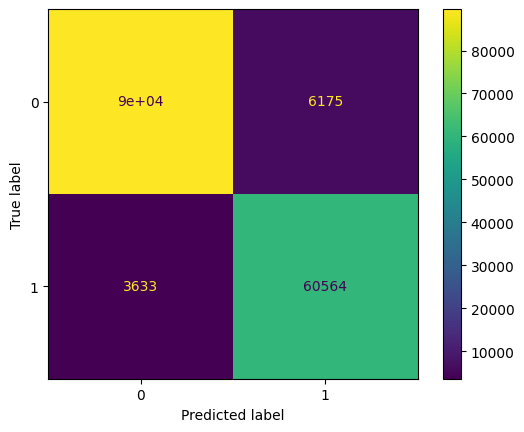

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
TN, FP, FN, TP = cm.ravel()
print(cm)
print(FN*15 + FP*35)

[[89628  6175]
 [ 3633 60564]]
270620
